In [105]:
from pathlib import Path
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc
import matplotlib.pyplot as plt

In [115]:
house_df = pd.read_csv('all_data.csv')
house_df

,Province,year,House Prices,Kilotonnes,Crime/100000,Immigration Totals,Med Imm Wages,Household Income,Population
0,Newfoundland,2015.0,299300.0,11299.0,6370.75,390.0,35200.0,341412.0,2113237.0
1,Newfoundland,2016.0,298800.0,11636.0,6500.63,345.0,40700.0,342472.0,2117189.0
2,Newfoundland,2017.0,294900.0,11505.0,6042.04,285.0,45600.0,343966.0,2114428.0
3,Newfoundland,2018.0,285000.0,11337.0,6041.56,300.0,45100.0,346836.0,2105228.0
4,Newfoundland,2019.0,272700.0,11277.0,6686.65,300.0,47100.0,349654.0,2096208.0
5,PEI,2015.0,204200.0,1584.0,4750.04,325.0,17500.0,292544.0,578067.0
6,PEI,2016.0,214700.0,1712.0,5012.62,325.0,23200.0,292419.0,585891.0
7,PEI,2017.0,240400.0,1762.0,4713.37,325.0,22300.0,299369.0,598819.0
8,PEI,2018.0,266400.0,1767.0,5391.93,330.0,21500.0,300355.0,612103.0
9,PEI,2019.0,277300.0,1799.0,6279.33,280.0,27500.0,310472.0,627367.0


In [116]:
house_df.columns

Index(['Province', 'year', 'House Prices', 'Kilotonnes', 'Crime/100000',
       'Immigration Totals', 'Med Imm Wages', 'Household Income',
       'Population'],
      dtype='object')

In [118]:
house_df.Province.value_counts()

Newfoundland     5
PEI              5
Nova Scotia      5
New Brunswick    5
Quebec           5
Ontario          5
Manitoba         5
Saskatchewan     5
Alberta          5
BC               5
Name: Province, dtype: int64

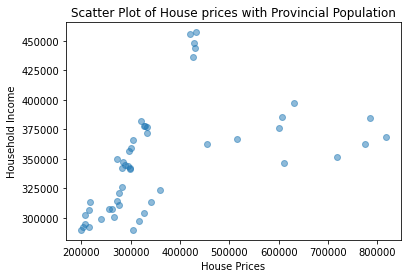

In [119]:
# Creating a scatterplot for house price and household income
plt.scatter(house_df["House Prices"], house_df["Household Income"], alpha=0.5)
plt.title("Scatter Plot of House prices with Provincial Population")
plt.xlabel("House Prices")
plt.ylabel("Household Income")
plt.show()


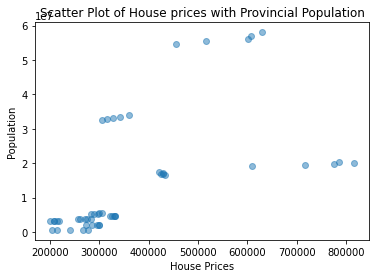

In [120]:
# House price and population
plt.scatter(house_df["House Prices"], house_df["Population"], alpha=0.5)
plt.title("Scatter Plot of House prices with Provincial Population")
plt.xlabel("House Prices")
plt.ylabel("Population")
plt.show()

In [121]:
# Creating dummy variables for provinces
house_df['Alberta_province'] = np.where(house_df['Province']=='Alberta', 1, 0)
house_df['BritishColumbia_province'] = np.where(house_df['Province']=='British Columbia', 1, 0)
house_df['Manitoba_province'] = np.where(house_df['Province']=='Manitoba', 1, 0)
house_df['NewBrunswick_province'] = np.where(house_df['Province']=='New Brunswick', 1, 0)
house_df['Newfoundland_and_Labrador_province'] = np.where(house_df['Province']=='Newfoundland and Labrador', 1, 0)
house_df['NovaScotia_province'] = np.where(house_df['Province']=='Nova Scotia', 1, 0)
house_df['Ontario_province'] = np.where(house_df['Province']=='Ontario', 1,0)
house_df['PrinceEdwardIsland_province'] = np.where(house_df['Province']=='Prince Edward Island	', 1, 0)
house_df['Quebec_province'] = np.where(house_df['Province']=='Quebec', 1, 0)
house_df['Saskatchewan_province'] = np.where(house_df['Province']=='Saskatchewan', 1, 0)

# Dropping original column state
house_df.drop(columns=['Province'], axis=1, inplace=True)


In [122]:
house_df

,year,House Prices,Kilotonnes,Crime/100000,Immigration Totals,Med Imm Wages,Household Income,Population,Alberta_province,BritishColumbia_province,Manitoba_province,NewBrunswick_province,Newfoundland_and_Labrador_province,NovaScotia_province,Ontario_province,PrinceEdwardIsland_province,Quebec_province,Saskatchewan_province
0,2015.0,299300.0,11299.0,6370.75,390.0,35200.0,341412.0,2113237.0,0,0,0,0,0,0,0,0,0,0
1,2016.0,298800.0,11636.0,6500.63,345.0,40700.0,342472.0,2117189.0,0,0,0,0,0,0,0,0,0,0
2,2017.0,294900.0,11505.0,6042.04,285.0,45600.0,343966.0,2114428.0,0,0,0,0,0,0,0,0,0,0
3,2018.0,285000.0,11337.0,6041.56,300.0,45100.0,346836.0,2105228.0,0,0,0,0,0,0,0,0,0,0
4,2019.0,272700.0,11277.0,6686.65,300.0,47100.0,349654.0,2096208.0,0,0,0,0,0,0,0,0,0,0
5,2015.0,204200.0,1584.0,4750.04,325.0,17500.0,292544.0,578067.0,0,0,0,0,0,0,0,0,0,0
6,2016.0,214700.0,1712.0,5012.62,325.0,23200.0,292419.0,585891.0,0,0,0,0,0,0,0,0,0,0
7,2017.0,240400.0,1762.0,4713.37,325.0,22300.0,299369.0,598819.0,0,0,0,0,0,0,0,0,0,0
8,2018.0,266400.0,1767.0,5391.93,330.0,21500.0,300355.0,612103.0,0,0,0,0,0,0,0,0,0,0
9,2019.0,277300.0,1799.0,6279.33,280.0,27500.0,310472.0,627367.0,0,0,0,0,0,0,0,0,0,0


In [123]:
dependent_variable = 'House Prices'

In [124]:
independent_variables = house_df.columns.tolist()

In [125]:
independent_variables.remove(dependent_variable)

In [126]:
independent_variables

['year',
 'Kilotonnes',
 'Crime/100000',
 'Immigration Totals',
 'Med Imm Wages',
 'Household Income',
 'Population',
 'Alberta_province',
 'BritishColumbia_province',
 'Manitoba_province',
 'NewBrunswick_province',
 'Newfoundland_and_Labrador_province',
 'NovaScotia_province',
 'Ontario_province',
 'PrinceEdwardIsland_province',
 'Quebec_province',
 'Saskatchewan_province']

In [127]:
X = house_df[independent_variables].values

y = house_df[dependent_variable].values

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [129]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
X_train[0:10]

array([[7.50000000e-01, 7.63132850e-02, 6.29858627e-01, 9.43396226e-02,
        6.34057971e-01, 4.13526380e-01, 8.39002001e-02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.69391051e-01, 9.37672370e-01, 5.55092255e-02,
        7.97101449e-01, 5.20830720e-01, 6.79105494e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [2.50000000e-01, 5.91861454e-01, 7.30420854e-03, 9.62107787e-01,
        4.71014493e-01, 4.61692380e-01, 9.53645956e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 7.49506121e-02, 7.21056376e-01, 9.376

In [131]:
# fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [141]:
# predicting the test results
y_pred = regressor.predict(X_test)
y_pred

array([581561.14199958, 249023.41882886, 243191.69922041, 447923.21604705,
       298896.9930215 , 551893.65868436, 332647.29382983, 277783.0221576 ,
       317471.05012372, 305267.72020106])

In [139]:
math.sqrt(mean_squared_error(y_test, y_pred))

22651.27682677456

In [140]:
r2_score(y_test, y_pred)

0.9683377600529597